In [1]:
import pandas as pd 
df = pd.read_csv('loan_data.csv')
df.tail()

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
95,95,1,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0
96,96,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0
97,97,1,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0
98,98,1,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0
99,99,1,home_improvement,0.0933,239.65,11.440355,9.66,792,4529.000000,128000,0.0,3,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit.policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int.rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log.annual.inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days.with.cr.line  100 non-null    float64
 9   revol.bal          100 non-null    int64  
 10  revol.util         100 non-null    float64
 11  inq.last.6mths     100 non-null    int64  
 12  delinq.2yrs        100 non-null    int64  
 13  pub.rec            100 non-null    int64  
 14  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


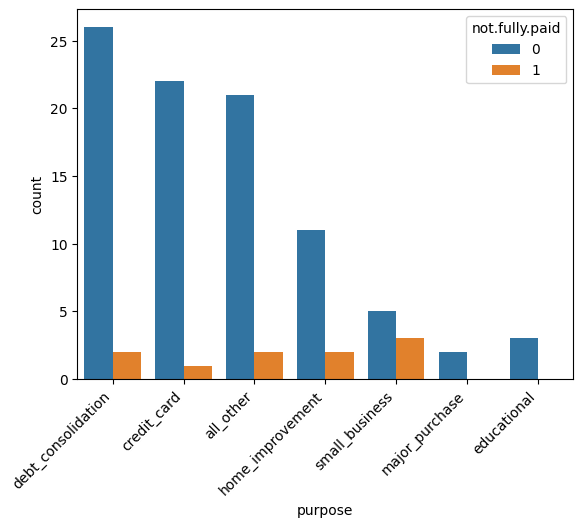

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data= df, x= 'purpose' , hue = 'not.fully.paid')
plt.xticks(rotation= 45, ha='right');

In [5]:
pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
pre_df.tail()

,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
95,95,1,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0,False,True,False,False,False,False
96,96,1,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0,False,True,False,False,False,False
97,97,1,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0,False,False,False,False,False,False
98,98,1,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0,False,False,False,False,False,False
99,99,1,0.0933,239.65,11.440355,9.66,792,4529.000000,128000,0.0,3,0,0,0,False,False,False,True,False,False


In [6]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
Y = pre_df['not.fully.paid']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=125)


In [9]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train);

In [16]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix, 
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    recall_score,
    precision_score,
)
Y_pred = NB.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
pre = precision_score(Y_test, Y_pred, average='weighted')


print("Accuracy : " , acc)
print("F1 Score : ", f1)
print("Recall score : ", recall)
print("Precision score : ", pre)




Accuracy :  0.8484848484848485
F1 Score :  0.7789369100844511
Recall score :  0.8484848484848485
Precision score :  0.7199265381083563


c:\Users\shail\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


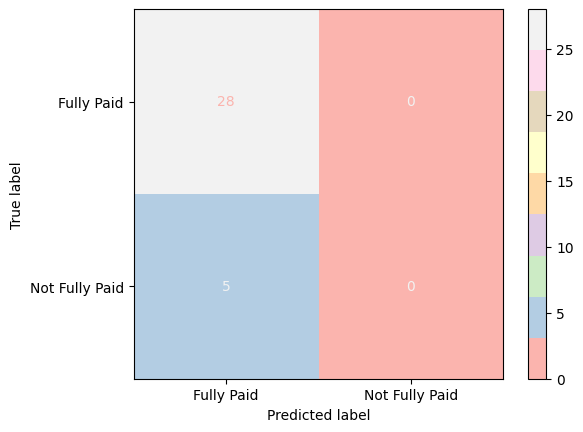

In [24]:
labels = ['Fully Paid', "Not Fully Paid"]
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=labels)
disp.plot( cmap = "Pastel1");